In [2]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
##########################################################################################
# Part (a): Create Network

In [4]:
# Open file and import data into arrays
source = []
target = []
weight = []
with open('airport_Edges_GC.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile, delimiter=',')
    for row in csvReader:
        source.append(row[0])
        target.append(row[1])
        weight.append(row[3])

Id = []
Lat = []
Long = []
with open('airport_Nodes_GC.csv', encoding="utf8") as csvDataFile:
    csvReader2 = csv.reader(csvDataFile, delimiter=',')
    for row in csvReader2:
        # print(row)
        Id.append(row[0])
        Lat.append(row[6])
        Long.append(row[7])
# print(Id)

In [5]:
# Create Graph according to the dataset:
G = nx.Graph()
# Add edges to the graph with weight 0
for x in range(1, len(source)):
    G.add_edge(source[x], target[x])
    G.edges[source[x], target[x]]['weight'] = 0
# Change weight of edges according to predefined rules
for x in range(1, len(source)):
    if G.edges[source[x], target[x]]['weight'] == 0:
        G.edges[source[x], target[x]]['weight'] = float(weight[x])
    else:
        aux = G.edges[source[x], target[x]]['weight']
        G.edges[source[x], target[x]]['weight'] = (float(weight[x]) + float(aux))/2
        # print(x, G.edges[source[x], target[x]]['weight'])

# print(G.number_of_nodes(), G.number_of_edges())
# Components = sorted(nx.connected_components(G), key=len, reverse=True)
# print(len(Components[0]))
##########################################################################################

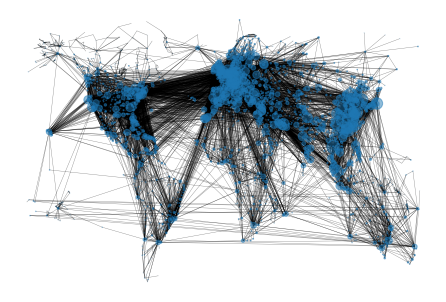

In [6]:
##########################################################################################
# Part (b): Plot Network
# Calculate node size based on weighted eigenvector centrality
siz = []
eigCentr = nx.eigenvector_centrality(G, weight='weight')
for node1 in G.nodes():
    G.nodes[node1]['pos'] = (float(Long[Id.index(node1)]), float(Lat[Id.index(node1)]))
    siz.append(1000*eigCentr[node1])

# Plot the Airport network
posit = nx.get_node_attributes(G,'pos')
plt.figure(0)
nx.draw(G, pos=posit, node_size=siz, width=0.35, alpha=0.5)
##########################################################################################

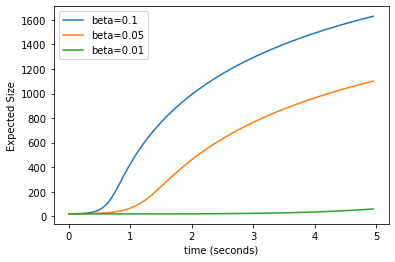

In [7]:
##########################################################################################
# Part (d): Simulating the spread dynamics
# Run simulation and plot the spread dynamics
# First, create adjacency matrix A with nodes ordered by Id:
Id_num = []
for x in range(1, len(Id)):
    Id_num.append(int(Id[x]))
Id_num_order = sorted(Id_num)
Id_order = []
for x in range(0, len(Id)-1):
    Id_order.append(str(Id_num_order[x]))
# A_sparse = nx.adjacency_matrix(G, nodelist=Id_order, weight='weight')
A_sparse = nx.adjacency_matrix(G, nodelist=Id_order)
A = A_sparse.todense()
# print(A, type(A), np.sqrt(np.size(A)))

#Second, create initial probability vector p(0) also ordered by Id
p_0 = np.zeros((len(Id_order), 1))
# print(p_0)
for x in range(20):
    p_0[x] = 1
# print(p_0)

delta = 0.05
Tf = 5
beta = 0.1
gama = 0.1

# Write code with loops to calculate all pi(t):
p = np.zeros((int(round(Tf/delta)), len(p_0)))
p_size1 = np.zeros((int(round(Tf/delta)), 1))
p_size1[0] = 20
# print(p_size1[0])
# To intialize, copy p_0 to the first column of p:
for i in range(len(p_0)):
    p[0][i] = p_0[i]
    # print(p[0][i])
# Later, calculate each new column iteratively
for t in range(1, int(round(Tf/delta))):
    # Calculate the Sum term:
    Sum = p[t-1]*A
    Sum_array = np.squeeze(np.asarray(Sum))
    # Use the value to calculate each pi(t):
    for i in range(len(p_0)):
        p[t][i] = p[t-1][i] + delta*(beta*(1 - p[t-1][i])*Sum_array[i] - gama*p[t-1][i])
        # print(p[t-1][i], p[t][i])
        p_size1[t] = p_size1[t] + p[t][i]
    # print(p_size1[t])

# Repeat for beta=0.05:
beta = 0.05
# Write code with loops to calculate all pi(t):
p = np.zeros((int(round(Tf/delta)), len(p_0)))
p_size2 = np.zeros((int(round(Tf/delta)), 1))
p_size2[0] = 20
# print(p_size2[0])
# To intialize, copy p_0 to the first column of p:
for i in range(len(p_0)):
    p[0][i] = p_0[i]
    # print(p[0][i])
# Later, calculate each new column iteratively
for t in range(1, int(round(Tf/delta))):
    # Calculate the Sum term:
    Sum = p[t-1]*A
    Sum_array = np.squeeze(np.asarray(Sum))
    # Use the value to calculate each pi(t):
    for i in range(len(p_0)):
        p[t][i] = p[t-1][i] + delta*(beta*(1 - p[t-1][i])*Sum_array[i] - gama*p[t-1][i])
        # print(p[t-1][i], p[t][i])
        p_size2[t] = p_size2[t] + p[t][i]
    # print(p_size1[t], p_size2[t])

# Repeat for beta=0.01:
beta = 0.01
# Write code with loops to calculate all pi(t):
p = np.zeros((int(round(Tf/delta)), len(p_0)))
p_size3 = np.zeros((int(round(Tf/delta)), 1))
p_size3[0] = 20
# print(p_size3[0])
# To intialize, copy p_0 to the first column of p:
for i in range(len(p_0)):
    p[0][i] = p_0[i]
    # print(p[0][i])
# Later, calculate each new column iteratively
for t in range(1, int(round(Tf/delta))):
    # Calculate the Sum term:
    Sum = p[t-1]*A
    Sum_array = np.squeeze(np.asarray(Sum))
    # Use the value to calculate each pi(t):
    for i in range(len(p_0)):
        p[t][i] = p[t-1][i] + delta*(beta*(1 - p[t-1][i])*Sum_array[i] - gama*p[t-1][i])
        # print(p[t-1][i], p[t][i])
        p_size3[t] = p_size3[t] + p[t][i]
    # print(p_size1[t], p_size2[t], p_size3[t])

# Plot three curves with the evolution of the expected size of the infection over time:
plt.figure(1)

t_axis = np.zeros((int(round(Tf/delta)), 1))
for x in range(1, len(t_axis)):
    t_axis[x] = t_axis[x-1] + delta
# print(t_axis)
fig = plt.plot(t_axis, p_size1, label='beta=0.1')
plt.plot(t_axis, p_size2, label='beta=0.05')
plt.plot(t_axis, p_size3, label='beta=0.01')
plt.xlabel('time (seconds)')
plt.ylabel('Expected Size')
plt.legend()

plt.show()
##########################################################################################

In [8]:
##########################################################################################
# Part (e): Minimum number of immunizations
beta = 0.01
gama = 0.4
eig_max = gama/beta

print('')
print('Part (e)')
print('The code to run this experiment is commented out below because it takes too long to run.')
print('The results obtained are as follows:')
print('(i) Minimum number of immunizations using degree centrality = 130')
print('(ii) Minimum number of immunizations using eigenvector centrality = 127')
print('Obs.: The centralities were calculated once at the beginning and the list was re-used for each step.')
print('Another approach would be to recalculate the centralities after deleting each node.')

# # Create adjacency matrix A with nodes ordered by weighted degree centrality:
# d_cent = nx.degree_centrality(G)
# # print(d_cent)
# # print(sorted(d_cent.values(), reverse=True))
# Centrality_order = sorted(d_cent, key=d_cent.__getitem__, reverse=True)
# # print(Centrality_order)
# A_sparse = nx.adjacency_matrix(G, nodelist=Centrality_order)
# A = A_sparse.todense()
# # print(np.sqrt(np.size(A)), type(A))
#
# # Calculate the leading eigenvalue of A:
# w, v = np.linalg.eig(A)
# y = []
# for x in range(len(w)):
#     y.append(np.linalg.norm(w[x]))
# eig_lead = max(y)
# # print(eig_lead)
#
# # Iteratively delete the first row and column of A until the lead eigenvalue is less than eig_max
# while eig_lead > eig_max:
#     A = np.delete(A, (0), axis=0)
#     A = np.delete(A, (0), axis=1)
#     # print(np.sqrt(np.size(A)), type(A))
#     # Calculate the leading eigenvalue of A:
#     w, v = np.linalg.eig(A)
#     y = []
#     for x in range(len(w)):
#         y.append(np.linalg.norm(w[x]))
#     eig_lead = max(y)
#     # print(eig_lead)
# print(int(np.sqrt(np.size(A))))
#
# # Repeat for eigenvector centrality:
# # Create adjacency matrix A with nodes ordered by weighted degree centrality:
# eig_cent = nx.eigenvector_centrality(G, weight='weight')
# # print(eig_cent)
# # print(sorted(eig_cent.values(), reverse=True))
# Centrality_order = sorted(eig_cent, key=eig_cent.__getitem__, reverse=True)
# # print(Centrality_order)
# A_sparse = nx.adjacency_matrix(G, nodelist=Centrality_order)
# A = A_sparse.todense()
# # print(np.sqrt(np.size(A)), type(A))
#
# # Calculate the leading eigenvalue of A:
# w, v = np.linalg.eig(A)
# y = []
# for x in range(len(w)):
#     y.append(np.linalg.norm(w[x]))
# eig_lead = max(y)
# # print(eig_lead)
#
# # Iteratively delete the first row and column of A until the lead eigenvalue is less than eig_max
# while eig_lead > eig_max:
#     A = np.delete(A, (0), axis=0)
#     A = np.delete(A, (0), axis=1)
#     # print(np.sqrt(np.size(A)), type(A))
#     # Calculate the leading eigenvalue of A:
#     w, v = np.linalg.eig(A)
#     y = []
#     for x in range(len(w)):
#         y.append(np.linalg.norm(w[x]))
#     eig_lead = max(y)
#     # print(eig_lead)
# print(int(np.sqrt(np.size(A))))


Part (e)
The code to run this experiment is commented out below because it takes too long to run.
The results obtained are as follows:
(i) Minimum number of immunizations using degree centrality = 130
(ii) Minimum number of immunizations using eigenvector centrality = 127
Obs.: The centralities were calculated once at the beginning and the list was re-used for each step.
Another approach would be to recalculate the centralities after deleting each node.
